## About

This page showcases the work by the data visualization team at [The Economist](https://www.economist.com/). You can find the original chart in [this article](https://www.economist.com/graphic-detail/2021/08/24/infections-caught-in-laboratories-are-surprisingly-common).

Thanks to them for all the inspiring and insightful visualizations! Thanks also to [Tomás Capretto](https://tcapretto.netlify.app/) who replicated the chart in Python! 🙏🙏

As a teaser, here is the plot we’re gonna try building:

![preview final chart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-horizontal-barplot-with-labels-the-economist.png?raw=true)

## Load libraries

At first sight, one may be tempted to think that today's chart looks rather simple. However, it actually contains several subtle customizations that when added all together make the final result look beautiful. This is also going to be a great opportunity to try an interesting variety of tools from Matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

## Create data

Let's get started by creating the objects that are going to hold the data for us. Note these values are inferred from the original plot and not something we computed from the original data source.

In [2]:
counts = [6, 7, 7, 9, 11, 15, 17, 18, 54]
names = [
    "Hantavirus", "Tularemia", "Dengue", "Ebola", "E. coli", 
    "Tuberculosis", "Salmonella", "Vaccinia", "Brucella"
]

# The positions for the bars
# This allows us to determine exactly where each bar is located
y = [i * 0.9 for i in range(len(names))]

And let's also define the colors that are going to be used today.

In [3]:
# The colors
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

## Basic barchart

Creating a horizontal [basic barchart](https://python-graph-gallery.com/barplot/) in Matplotlib is quite simple. You just pass the locations of the bars and their heights to the `.barh()` method.

In this case, we also set the `height` and the `align` arguments. The first one determines the height of the bars, and the second one means the locations in `y` are used for the edges of the bar.

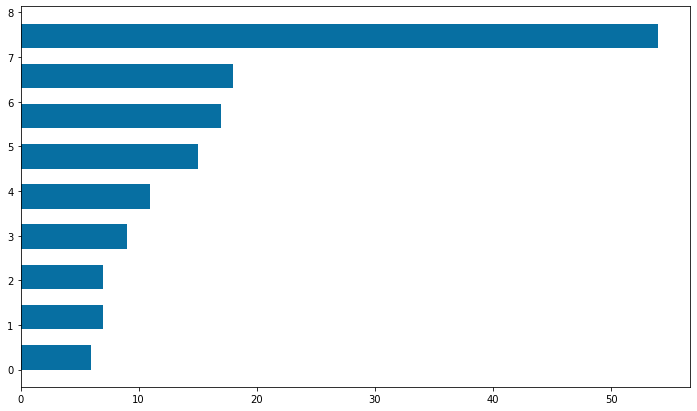

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.barh(y, counts, height=0.55, align="edge", color=BLUE);

You can notice that the bottom edge of the first bar is located at 0, the first value in the list `y`. You can also see the locations aren't given by round numbers. This is to have more control on the height of the bars and their separation.

## Customize layout

The next step is to customize the layout. Here we customize the tickmarks, the spines, the grid lines, and more.

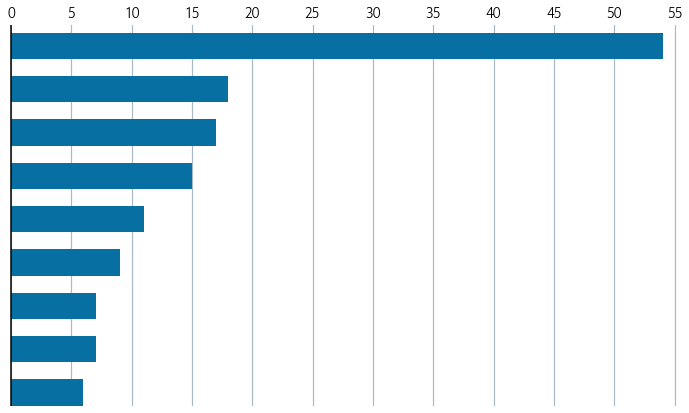

In [5]:
ax.xaxis.set_ticks([i * 5 for i in range(0, 12)])
ax.xaxis.set_ticklabels([i * 5 for i in range(0, 12)], size=16, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 55.5))
ax.set_ylim((0, len(names) * 0.9 - 0.2))

# Set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
# This capstyle determines the lines don't go beyond the limit we specified
# see: https://matplotlib.org/stable/api/_enums_api.html?highlight=capstyle#matplotlib._enums.CapStyle
ax.spines["left"].set_capstyle("butt")

# Hide y labels
ax.yaxis.set_visible(False)

fig

Although there's still work to be done, this is definitely an improvement!

## Add labels

Now it's time to add labels. These represent the name of the infection. Notice that we're going to be used two different colors, depending on whether the name fits in the bar or not. Also, notice the path effect that is added to the labels in blue. Without this effect we would see the grid line at 10 passing behind the text. 

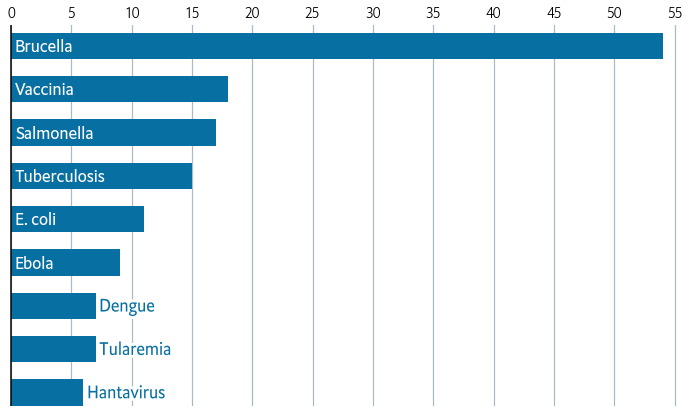

In [6]:
PAD = 0.3
for name, count, y_pos in zip(names, counts, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 8:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontfamily="Econ Sans Cnd", fontsize=18, va="center",
        path_effects=path_effects
    ) 
fig   

## Add annotations and final tweaks

The last step is to add a title, a subtitle, a caption, and other subtleties that really make the difference.

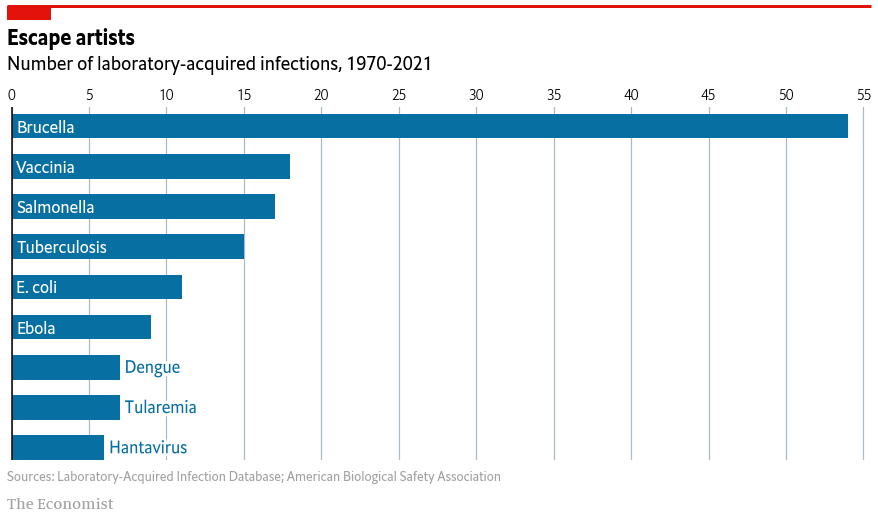

In [7]:
# Make room on top and bottom
# Note there's no room on the left and right sides
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Escape artists", 
    fontsize=22, fontweight="bold", fontfamily="Econ Sans Cnd"
)
# Add subtitle
fig.text(
    0, 0.875, "Number of laboratory-acquired infections, 1970-2021", 
    fontsize=20, fontfamily="Econ Sans Cnd"
)

# Add caption
source = "Sources: Laboratory-Acquired Infection Database; American Biological Safety Association"
fig.text(
    0, 0.06, source, color=GREY, 
    fontsize=14, fontfamily="Econ Sans Cnd"
)

# Add authorship
fig.text(
    0, 0.005, "The Economist", color=GREY,
    fontsize=16, fontfamily="Milo TE W01"
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")
fig

#fig.savefig("plot.png", dpi=300)

And there we got it! It's so elegant 🍸️